#### Problem Statement
- ##### Prediction of Diamond Category Using Machine Learning

#### Importing Necessary Libraries


In [3]:
#for maupulation operations
import numpy as np
import pandas as pd

#for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to import vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

#to import train test split
from sklearn.model_selection import train_test_split ,GridSearchCV,RandomizedSearchCV

#import linear regression
from sklearn.linear_model import LogisticRegression , Ridge ,Lasso

#to import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,multilabel_confusion_matrix

# Import Decision Tree 
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

#importing min max scalar
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#importing support vector classifier/regressor
from sklearn.svm import SVC,SVR
#importing catboost,xgboost classifer 
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")    ##Removes All The Warnings Present

#### Importing Necessary Dataset

In [4]:
df=pd.read_csv(r"F:\Mayank Study\Itvedant\DataSet\ML Datasets\Diamond Category Prediction.csv")
df

carat   category color clarity  depthPercent  table  price  length  \
0       0.23      Ideal     E     SI2          61.5   55.0    326    3.95   
1       0.21    Premium     E     SI1          59.8   61.0    326    3.89   
2       0.23       Good     E     VS1          56.9   65.0    327    4.05   
3       0.29    Premium     I     VS2          62.4   58.0    334    4.20   
4       0.31       Good     J     SI2          63.3   58.0    335    4.34   
...      ...        ...   ...     ...           ...    ...    ...     ...   
53938   0.86    Premium     H     SI2          61.0   58.0   2757    6.15   
53939   0.75      Ideal     D     SI2          62.2   55.0   2757    5.83   
53940   0.71    Premium     E     SI1          60.5   55.0   2756    5.79   
53941   0.71    Premium     F     SI1          59.8   62.0   2756    5.74   
53942   0.70  Very Good     E     VS2          60.5   59.0   2757    5.71   

       width  depth  
0       3.98   2.43  
1       3.84   2.31  
2       4.07   2.31  
3       4.23   2.63  
4       4.35   2.75  
...      ...    ...  
53938   6.12   3.74  
53939   5.87   3.64  
53940   5.74   3.49  
53941   5.73   3.43  
53942   5.76   3.47  

[53943 rows x 10 columns]

The dataset contains both numerical and categorical data. There are both dependent and independent variables present in the dataframe. We have our categorical column as **"category"** which stores the Category of Diamonds and it is discrete in nature which makes this to be a **"Classification Problem"**.

#### Data Description (Attribute Information)

- carat	- what quality carat of diamond is 
- category	- to which type of category diamond belongs
- color	- color of diamond
- clarity - clarity note of diamond	
- depthPercent	- depth of diamond 
- table	- which table diamond belongs
- price	- Price of diamond
- length - Length of diamond	
- width	- width of diamond
- depth - depth  of diamond

## EDA (Exploratory data Analysys)

In [5]:
df.shape  #Checking dimension of dataset
print(f"The Dataset has {df.shape[0]} Rows and {df.shape[1]} Columns ")

The Dataset has 53943 Rows and 10 Columns 


In [6]:
#to get good  overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53943 non-null  float64
 1   category      53943 non-null  object 
 2   color         53943 non-null  object 
 3   clarity       53943 non-null  object 
 4   depthPercent  53943 non-null  float64
 5   table         53943 non-null  float64
 6   price         53943 non-null  int64  
 7   length        53943 non-null  float64
 8   width         53943 non-null  float64
 9   depth         53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
#statistical summary of dataset
df.describe()

carat  depthPercent         table         price        length  \
count  53943.000000  53943.000000  53943.000000  53943.000000  53943.000000   
mean       0.797935     61.749322     57.457251   3932.734294      5.731158   
std        0.473999      1.432626      2.234549   3989.338447      1.121730   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

              width         depth  
count  53943.000000  53943.000000  
mean       5.734526      3.538730  
std        1.142103      0.705679  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

This gives the statistical information of the dataset. The summary of Diamond Category dataset looks perfect since there is no negative/ invalid values present.

In [8]:
#checking columns present in dataset
print(f"The Columns Present in dataset are \n",df.columns)

The Columns Present in dataset are 
 Index(['carat', 'category', 'color', 'clarity', 'depthPercent', 'table',
       'price', 'length', 'width', 'depth'],
      dtype='object')


In [9]:
#Checking Unique  values in each Column of dataset
df.nunique().to_frame("Unique values")

Unique values
carat                   273
category                  5
color                     7
clarity                   8
depthPercent            184
table                   127
price                 11602
length                  554
width                   552
depth                   375

In [10]:
#Checking Null values
df.isna().sum()

carat           0
category        0
color           0
clarity         0
depthPercent    0
table           0
price           0
length          0
width           0
depth           0
dtype: int64

### Data visualization

##### Univariate Analysis

<Axes: xlabel='carat', ylabel='Density'>

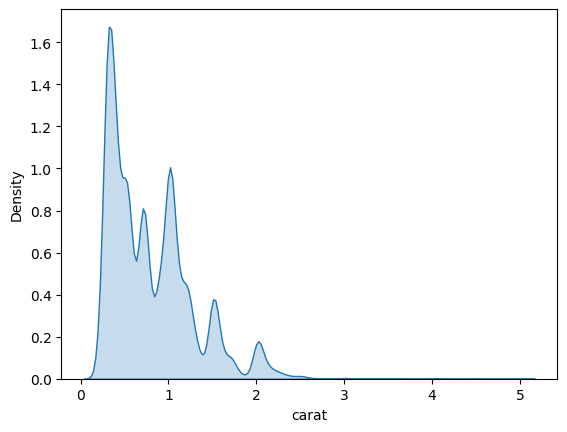

In [11]:
sns.kdeplot(df["carat"],fill=True)

<Axes: xlabel='depth', ylabel='Density'>

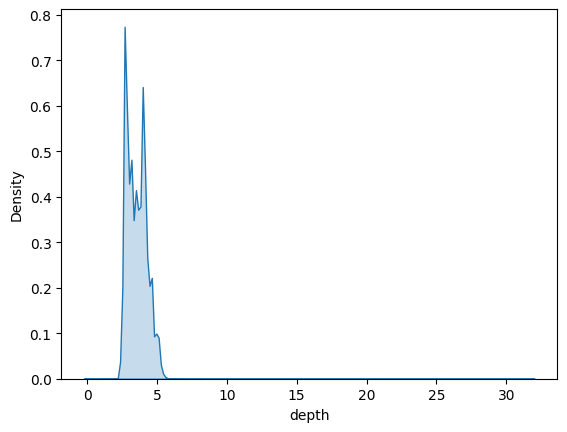

In [12]:
sns.kdeplot(df["depth"],fill=True)

<Axes: xlabel='depthPercent', ylabel='Density'>

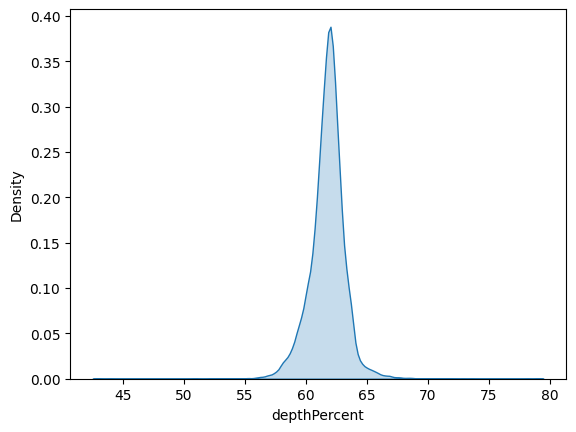

In [13]:
sns.kdeplot(df["depthPercent"],fill=True)

<Axes: xlabel='length', ylabel='Density'>

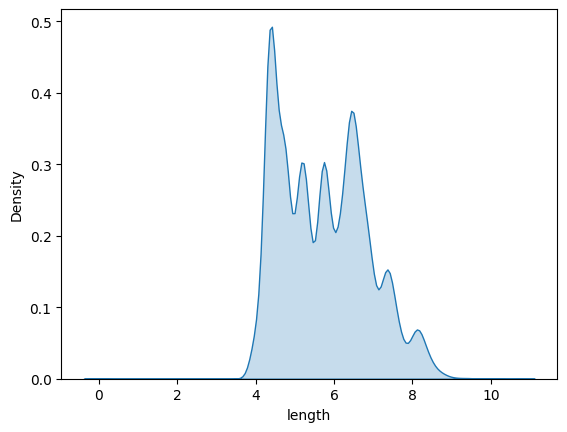

In [14]:
sns.kdeplot(df["length"],fill=True)

<Axes: xlabel='price', ylabel='Density'>

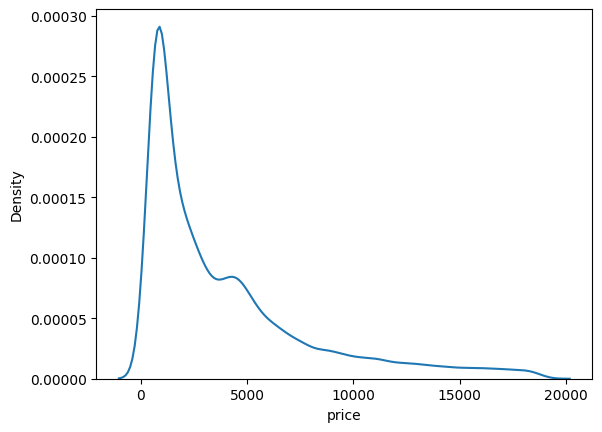

In [15]:
sns.kdeplot(df["price"])

### Bivariate Analysis

<Axes: title={'center': 'Comparison Of Length and Width'}, xlabel='length', ylabel='width'>

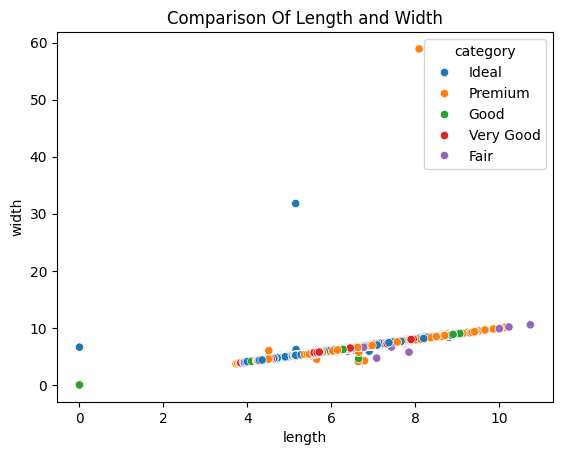

In [16]:
plt.title("Comparison Of Length and Width")
sns.scatterplot(x=df["length"],y=df["width"],hue=df["category"])

<Axes: xlabel='carat', ylabel='clarity'>

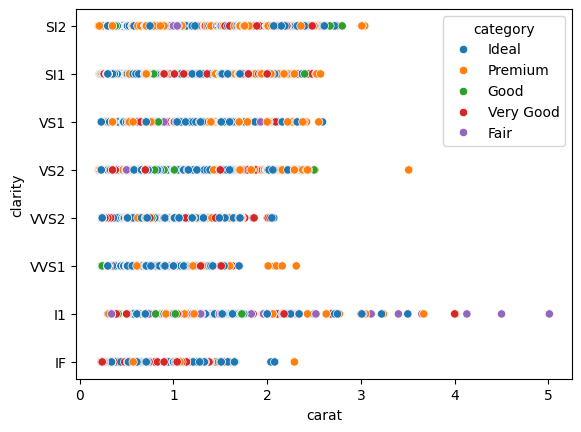

In [17]:
sns.scatterplot(x=df["carat"],y=df["clarity"],hue=df["category"])

This scatter plot shows the comparision between the carat and clarity on the basis of target variable category. There exists strong linear relationship between the two columns.

### Multivariate Analysis

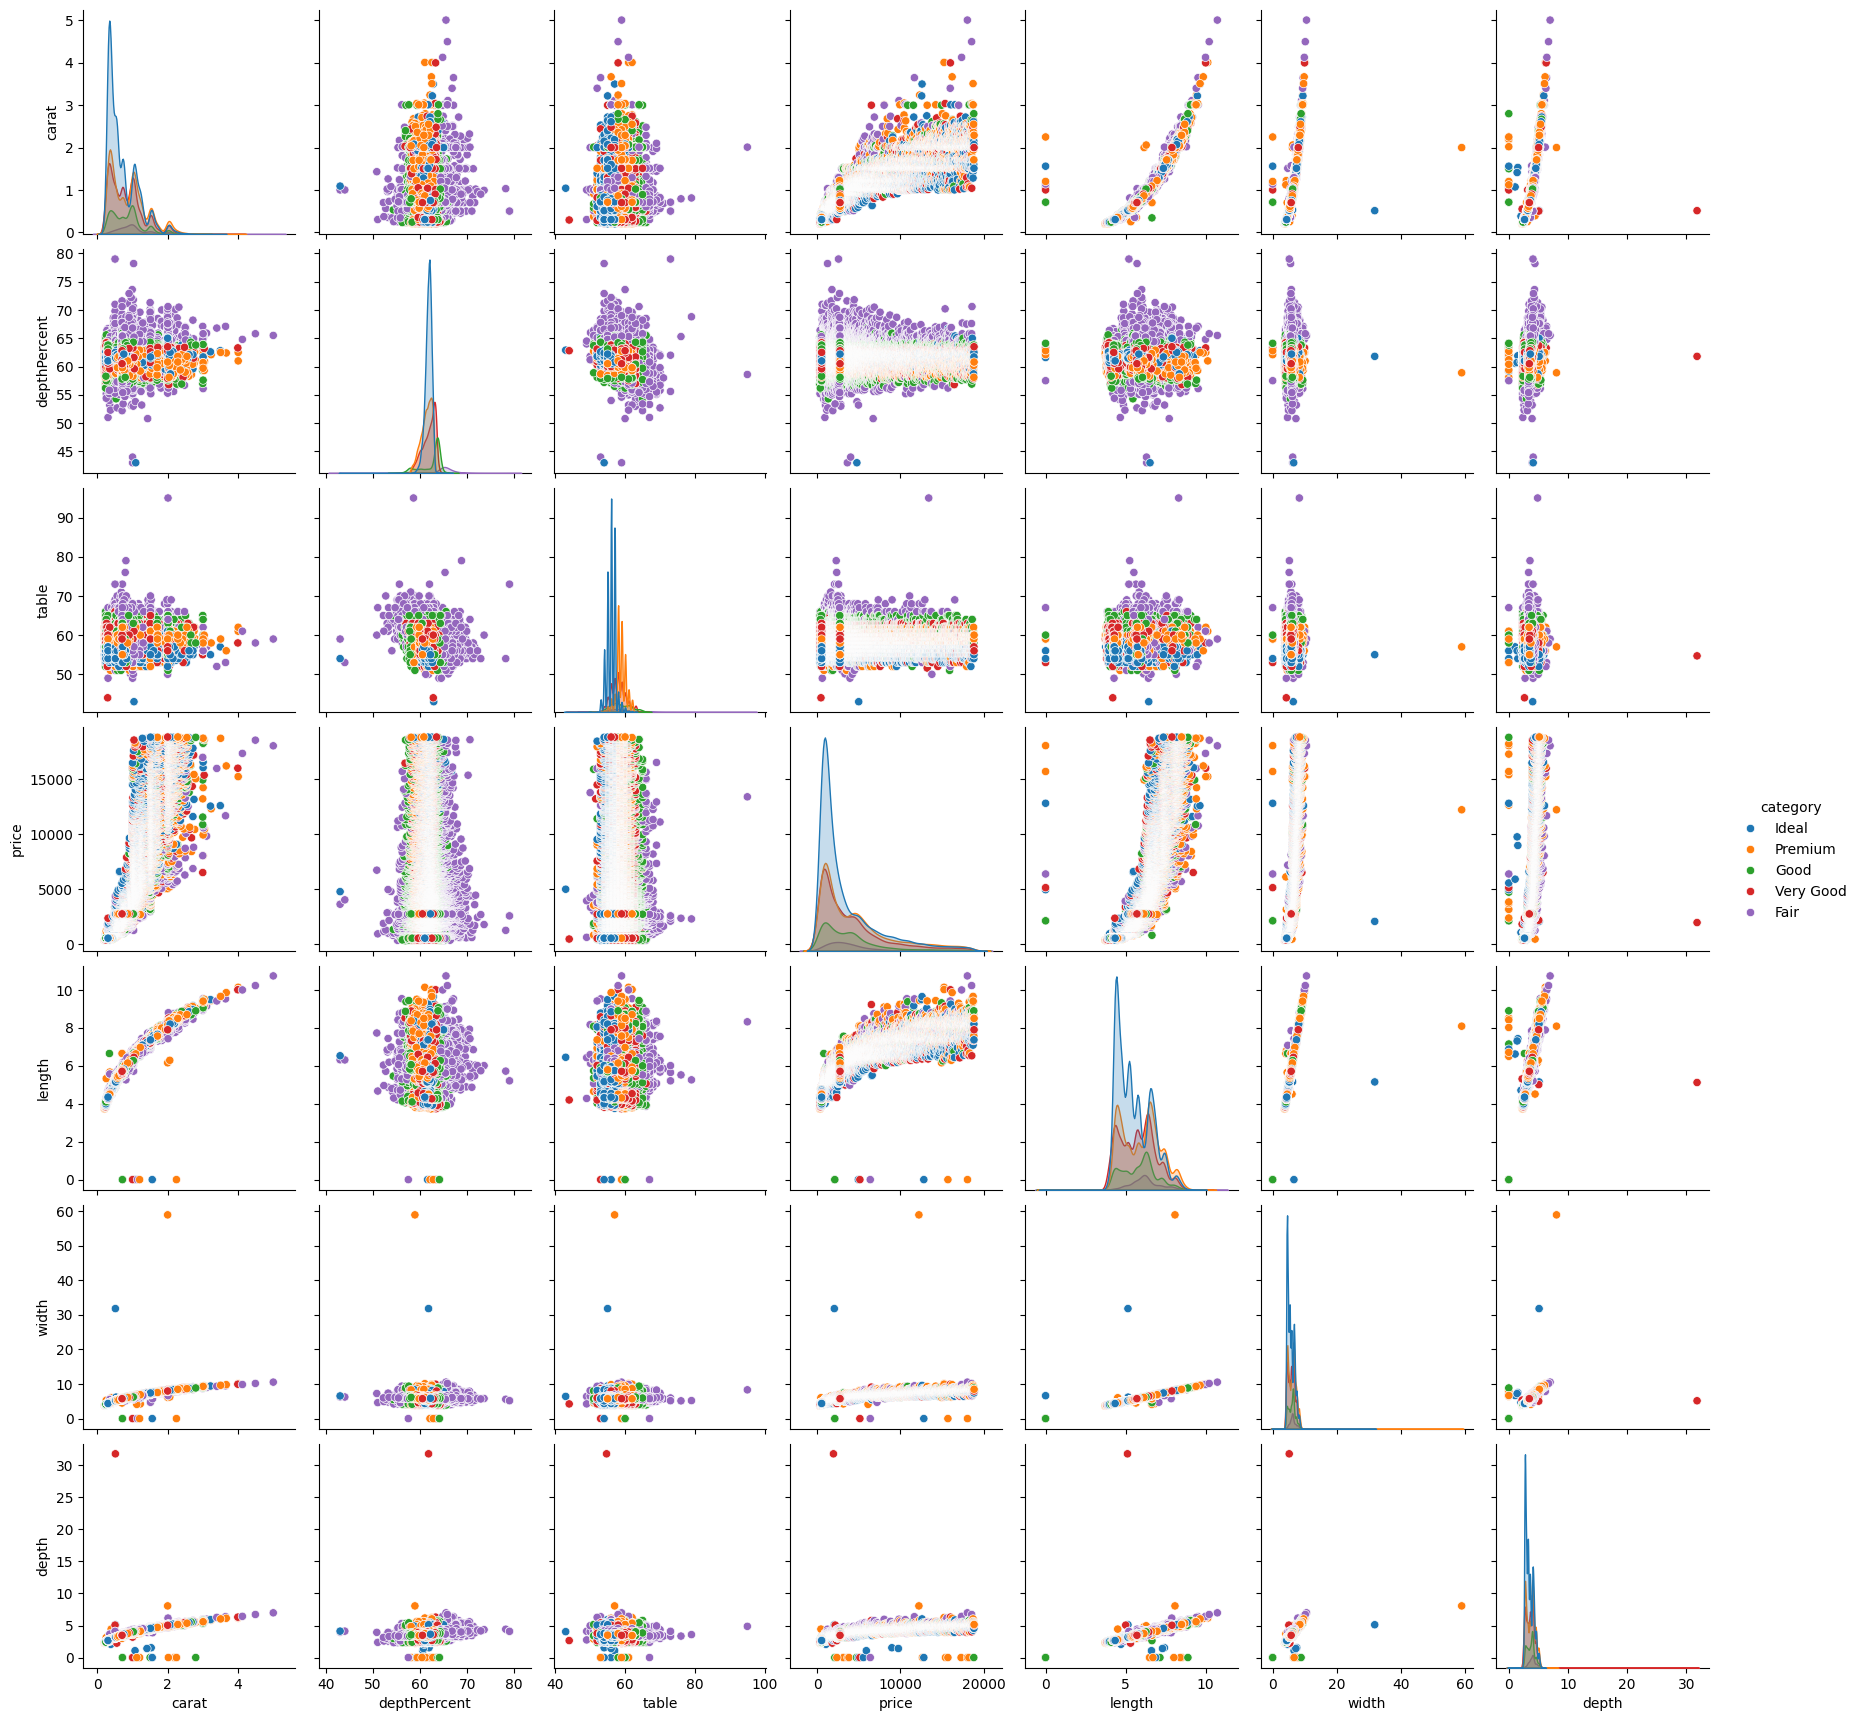

In [18]:
#sns.pairplot(df,hue="category")

In [19]:
#Checking The Counts Of Each Category
df["category"].value_counts()  

category
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

<Axes: xlabel='category', ylabel='count'>

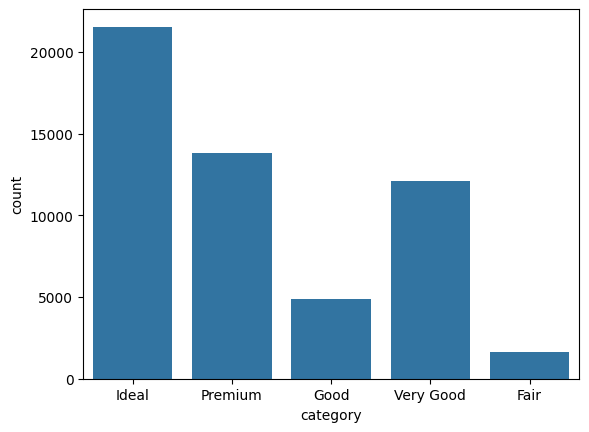

In [17]:
#CountPlot of category Of  diamonds
sns.countplot(x=df["category"])

## Feature Engg

In [18]:
df["clarity"].replace({'SI2':0, 'SI1':1, 'VS1':2, 'VS2':3, 'VVS2':4, 'VVS1':5, 'I1':6, 'IF':7},inplace=True)

In [19]:
df["color"].replace({'E':0, 'I':1, 'J':2, 'H':3, 'F':4, 'G':5, 'D':6},inplace=True)


In [20]:
## Replaced Target Column Here 
df["category"].replace({'Ideal':4, 'Premium':3, 'Good':1, 'Very Good':2, 'Fair':0},inplace=True)

In [21]:
df

carat  category  color  clarity  depthPercent  table  price  length  \
0       0.23         4      0        0          61.5   55.0    326    3.95   
1       0.21         3      0        1          59.8   61.0    326    3.89   
2       0.23         1      0        2          56.9   65.0    327    4.05   
3       0.29         3      1        3          62.4   58.0    334    4.20   
4       0.31         1      2        0          63.3   58.0    335    4.34   
...      ...       ...    ...      ...           ...    ...    ...     ...   
53938   0.86         3      3        0          61.0   58.0   2757    6.15   
53939   0.75         4      6        0          62.2   55.0   2757    5.83   
53940   0.71         3      0        1          60.5   55.0   2756    5.79   
53941   0.71         3      4        1          59.8   62.0   2756    5.74   
53942   0.70         2      0        3          60.5   59.0   2757    5.71   

       width  depth  
0       3.98   2.43  
1       3.84   2.31  
2       4.07   2.31  
3       4.23   2.63  
4       4.35   2.75  
...      ...    ...  
53938   6.12   3.74  
53939   5.87   3.64  
53940   5.74   3.49  
53941   5.73   3.43  
53942   5.76   3.47  

[53943 rows x 10 columns]

### Identifying The Outliers

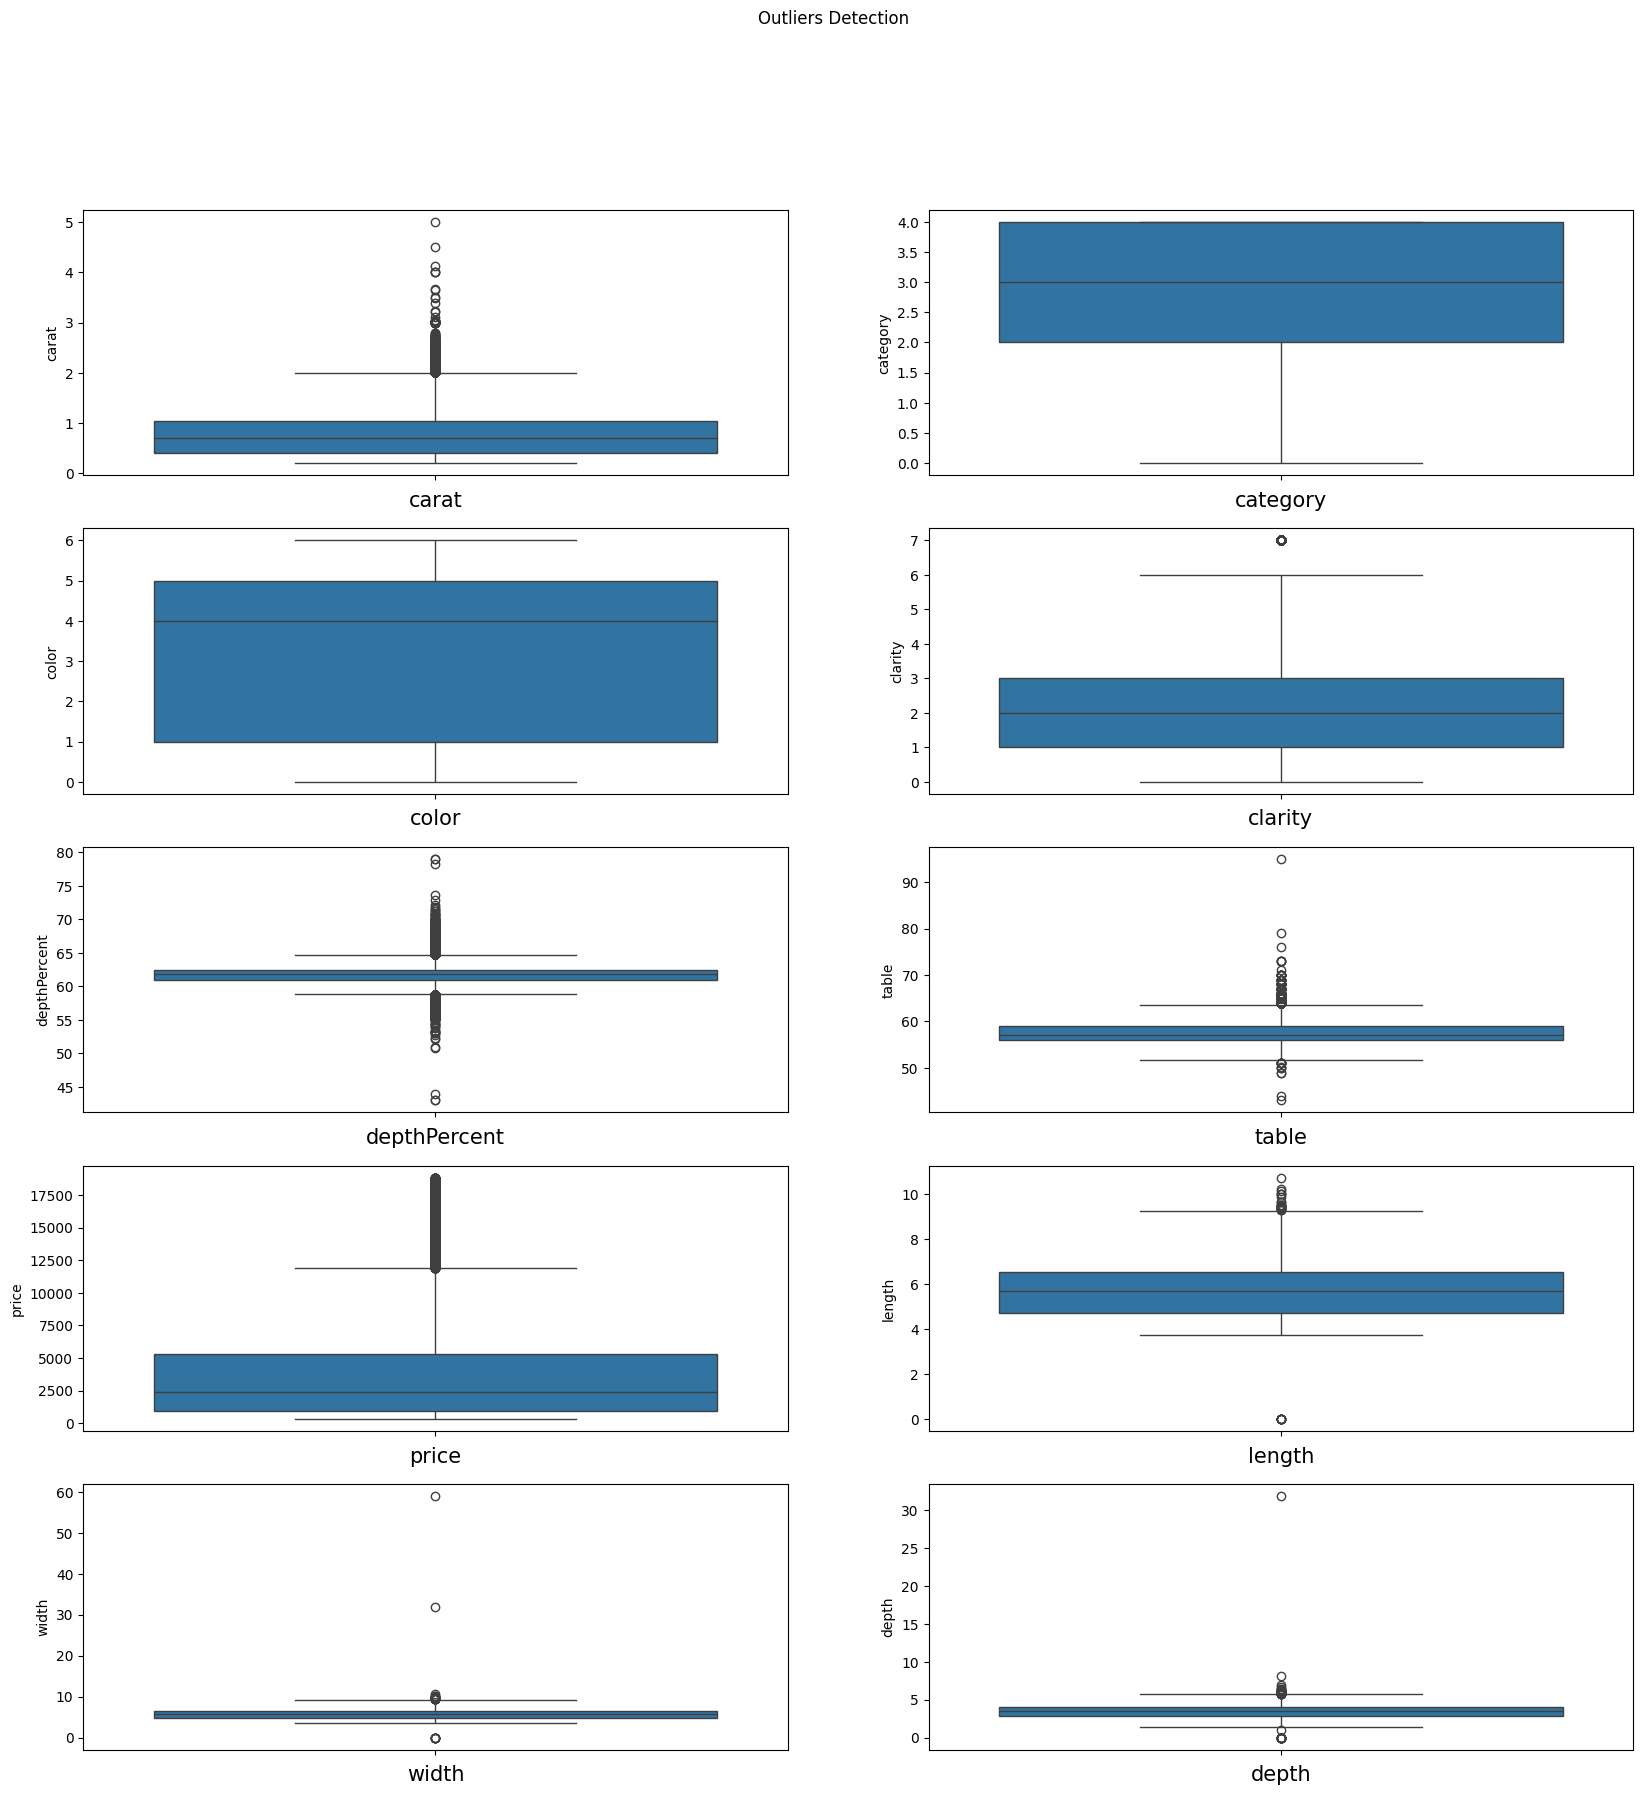

<Figure size 640x480 with 0 Axes>

In [22]:
## Checking Outliers By Calculation [BEFORE]
plt.figure(figsize=(20,20))
plt.suptitle("Outliers Detection")
pltn=1
for i in df:
    if pltn <=10:
        plt.subplot(5,2,pltn)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
    pltn=pltn+1

plt.show()
plt.tight_layout()

#### Removing Outliers

In [23]:
#checcking and handling of outliers by using iqr  method
def find_outliers(m):
    q1=df[m].quantile(0.25)
    q3=df[m].quantile(0.75)

    iqr = q3-q1

    lower_tail = q1-1.5*iqr
    upper_tail = q3+1.5*iqr

    print(f"Lower Tail : {lower_tail}")
    print(f"Upper Tail : {upper_tail}")

    outliers=df[(df[m]<lower_tail) | (df[m]>upper_tail)]
    df[m]=np.where(df[m]<lower_tail,lower_tail,np.where(df[m]>upper_tail,upper_tail,df[m]))
    return df

In [24]:
find_outliers("carat")

Lower Tail : -0.5599999999999999
Upper Tail : 2.0


carat  category  color  clarity  depthPercent  table  price  length  \
0       0.23         4      0        0          61.5   55.0    326    3.95   
1       0.21         3      0        1          59.8   61.0    326    3.89   
2       0.23         1      0        2          56.9   65.0    327    4.05   
3       0.29         3      1        3          62.4   58.0    334    4.20   
4       0.31         1      2        0          63.3   58.0    335    4.34   
...      ...       ...    ...      ...           ...    ...    ...     ...   
53938   0.86         3      3        0          61.0   58.0   2757    6.15   
53939   0.75         4      6        0          62.2   55.0   2757    5.83   
53940   0.71         3      0        1          60.5   55.0   2756    5.79   
53941   0.71         3      4        1          59.8   62.0   2756    5.74   
53942   0.70         2      0        3          60.5   59.0   2757    5.71   

       width  depth  
0       3.98   2.43  
1       3.84   2.31  
2       4.07   2.31  
3       4.23   2.63  
4       4.35   2.75  
...      ...    ...  
53938   6.12   3.74  
53939   5.87   3.64  
53940   5.74   3.49  
53941   5.73   3.43  
53942   5.76   3.47  

[53943 rows x 10 columns]

In [25]:
find_outliers("clarity")

Lower Tail : -2.0
Upper Tail : 6.0


carat  category  color  clarity  depthPercent  table  price  length  \
0       0.23         4      0      0.0          61.5   55.0    326    3.95   
1       0.21         3      0      1.0          59.8   61.0    326    3.89   
2       0.23         1      0      2.0          56.9   65.0    327    4.05   
3       0.29         3      1      3.0          62.4   58.0    334    4.20   
4       0.31         1      2      0.0          63.3   58.0    335    4.34   
...      ...       ...    ...      ...           ...    ...    ...     ...   
53938   0.86         3      3      0.0          61.0   58.0   2757    6.15   
53939   0.75         4      6      0.0          62.2   55.0   2757    5.83   
53940   0.71         3      0      1.0          60.5   55.0   2756    5.79   
53941   0.71         3      4      1.0          59.8   62.0   2756    5.74   
53942   0.70         2      0      3.0          60.5   59.0   2757    5.71   

       width  depth  
0       3.98   2.43  
1       3.84   2.31  
2       4.07   2.31  
3       4.23   2.63  
4       4.35   2.75  
...      ...    ...  
53938   6.12   3.74  
53939   5.87   3.64  
53940   5.74   3.49  
53941   5.73   3.43  
53942   5.76   3.47  

[53943 rows x 10 columns]

In [26]:
find_outliers("depthPercent")

Lower Tail : 58.75
Upper Tail : 64.75


carat  category  color  clarity  depthPercent  table  price  length  \
0       0.23         4      0      0.0         61.50   55.0    326    3.95   
1       0.21         3      0      1.0         59.80   61.0    326    3.89   
2       0.23         1      0      2.0         58.75   65.0    327    4.05   
3       0.29         3      1      3.0         62.40   58.0    334    4.20   
4       0.31         1      2      0.0         63.30   58.0    335    4.34   
...      ...       ...    ...      ...           ...    ...    ...     ...   
53938   0.86         3      3      0.0         61.00   58.0   2757    6.15   
53939   0.75         4      6      0.0         62.20   55.0   2757    5.83   
53940   0.71         3      0      1.0         60.50   55.0   2756    5.79   
53941   0.71         3      4      1.0         59.80   62.0   2756    5.74   
53942   0.70         2      0      3.0         60.50   59.0   2757    5.71   

       width  depth  
0       3.98   2.43  
1       3.84   2.31  
2       4.07   2.31  
3       4.23   2.63  
4       4.35   2.75  
...      ...    ...  
53938   6.12   3.74  
53939   5.87   3.64  
53940   5.74   3.49  
53941   5.73   3.43  
53942   5.76   3.47  

[53943 rows x 10 columns]

In [27]:
find_outliers("table")

Lower Tail : 51.5
Upper Tail : 63.5


carat  category  color  clarity  depthPercent  table  price  length  \
0       0.23         4      0      0.0         61.50   55.0    326    3.95   
1       0.21         3      0      1.0         59.80   61.0    326    3.89   
2       0.23         1      0      2.0         58.75   63.5    327    4.05   
3       0.29         3      1      3.0         62.40   58.0    334    4.20   
4       0.31         1      2      0.0         63.30   58.0    335    4.34   
...      ...       ...    ...      ...           ...    ...    ...     ...   
53938   0.86         3      3      0.0         61.00   58.0   2757    6.15   
53939   0.75         4      6      0.0         62.20   55.0   2757    5.83   
53940   0.71         3      0      1.0         60.50   55.0   2756    5.79   
53941   0.71         3      4      1.0         59.80   62.0   2756    5.74   
53942   0.70         2      0      3.0         60.50   59.0   2757    5.71   

       width  depth  
0       3.98   2.43  
1       3.84   2.31  
2       4.07   2.31  
3       4.23   2.63  
4       4.35   2.75  
...      ...    ...  
53938   6.12   3.74  
53939   5.87   3.64  
53940   5.74   3.49  
53941   5.73   3.43  
53942   5.76   3.47  

[53943 rows x 10 columns]

In [28]:
find_outliers("price")

Lower Tail : -5611.0
Upper Tail : 11885.0


carat  category  color  clarity  depthPercent  table   price  length  \
0       0.23         4      0      0.0         61.50   55.0   326.0    3.95   
1       0.21         3      0      1.0         59.80   61.0   326.0    3.89   
2       0.23         1      0      2.0         58.75   63.5   327.0    4.05   
3       0.29         3      1      3.0         62.40   58.0   334.0    4.20   
4       0.31         1      2      0.0         63.30   58.0   335.0    4.34   
...      ...       ...    ...      ...           ...    ...     ...     ...   
53938   0.86         3      3      0.0         61.00   58.0  2757.0    6.15   
53939   0.75         4      6      0.0         62.20   55.0  2757.0    5.83   
53940   0.71         3      0      1.0         60.50   55.0  2756.0    5.79   
53941   0.71         3      4      1.0         59.80   62.0  2756.0    5.74   
53942   0.70         2      0      3.0         60.50   59.0  2757.0    5.71   

       width  depth  
0       3.98   2.43  
1       3.84   2.31  
2       4.07   2.31  
3       4.23   2.63  
4       4.35   2.75  
...      ...    ...  
53938   6.12   3.74  
53939   5.87   3.64  
53940   5.74   3.49  
53941   5.73   3.43  
53942   5.76   3.47  

[53943 rows x 10 columns]

In [29]:
find_outliers("length")

Lower Tail : 1.9649999999999999
Upper Tail : 9.285


carat  category  color  clarity  depthPercent  table   price  length  \
0       0.23         4      0      0.0         61.50   55.0   326.0    3.95   
1       0.21         3      0      1.0         59.80   61.0   326.0    3.89   
2       0.23         1      0      2.0         58.75   63.5   327.0    4.05   
3       0.29         3      1      3.0         62.40   58.0   334.0    4.20   
4       0.31         1      2      0.0         63.30   58.0   335.0    4.34   
...      ...       ...    ...      ...           ...    ...     ...     ...   
53938   0.86         3      3      0.0         61.00   58.0  2757.0    6.15   
53939   0.75         4      6      0.0         62.20   55.0  2757.0    5.83   
53940   0.71         3      0      1.0         60.50   55.0  2756.0    5.79   
53941   0.71         3      4      1.0         59.80   62.0  2756.0    5.74   
53942   0.70         2      0      3.0         60.50   59.0  2757.0    5.71   

       width  depth  
0       3.98   2.43  
1       3.84   2.31  
2       4.07   2.31  
3       4.23   2.63  
4       4.35   2.75  
...      ...    ...  
53938   6.12   3.74  
53939   5.87   3.64  
53940   5.74   3.49  
53941   5.73   3.43  
53942   5.76   3.47  

[53943 rows x 10 columns]

In [30]:
find_outliers("width")

Lower Tail : 1.9899999999999993
Upper Tail : 9.27


carat  category  color  clarity  depthPercent  table   price  length  \
0       0.23         4      0      0.0         61.50   55.0   326.0    3.95   
1       0.21         3      0      1.0         59.80   61.0   326.0    3.89   
2       0.23         1      0      2.0         58.75   63.5   327.0    4.05   
3       0.29         3      1      3.0         62.40   58.0   334.0    4.20   
4       0.31         1      2      0.0         63.30   58.0   335.0    4.34   
...      ...       ...    ...      ...           ...    ...     ...     ...   
53938   0.86         3      3      0.0         61.00   58.0  2757.0    6.15   
53939   0.75         4      6      0.0         62.20   55.0  2757.0    5.83   
53940   0.71         3      0      1.0         60.50   55.0  2756.0    5.79   
53941   0.71         3      4      1.0         59.80   62.0  2756.0    5.74   
53942   0.70         2      0      3.0         60.50   59.0  2757.0    5.71   

       width  depth  
0       3.98   2.43  
1       3.84   2.31  
2       4.07   2.31  
3       4.23   2.63  
4       4.35   2.75  
...      ...    ...  
53938   6.12   3.74  
53939   5.87   3.64  
53940   5.74   3.49  
53941   5.73   3.43  
53942   5.76   3.47  

[53943 rows x 10 columns]

In [31]:
find_outliers("depth")

Lower Tail : 1.2150000000000003
Upper Tail : 5.734999999999999


carat  category  color  clarity  depthPercent  table   price  length  \
0       0.23         4      0      0.0         61.50   55.0   326.0    3.95   
1       0.21         3      0      1.0         59.80   61.0   326.0    3.89   
2       0.23         1      0      2.0         58.75   63.5   327.0    4.05   
3       0.29         3      1      3.0         62.40   58.0   334.0    4.20   
4       0.31         1      2      0.0         63.30   58.0   335.0    4.34   
...      ...       ...    ...      ...           ...    ...     ...     ...   
53938   0.86         3      3      0.0         61.00   58.0  2757.0    6.15   
53939   0.75         4      6      0.0         62.20   55.0  2757.0    5.83   
53940   0.71         3      0      1.0         60.50   55.0  2756.0    5.79   
53941   0.71         3      4      1.0         59.80   62.0  2756.0    5.74   
53942   0.70         2      0      3.0         60.50   59.0  2757.0    5.71   

       width  depth  
0       3.98   2.43  
1       3.84   2.31  
2       4.07   2.31  
3       4.23   2.63  
4       4.35   2.75  
...      ...    ...  
53938   6.12   3.74  
53939   5.87   3.64  
53940   5.74   3.49  
53941   5.73   3.43  
53942   5.76   3.47  

[53943 rows x 10 columns]

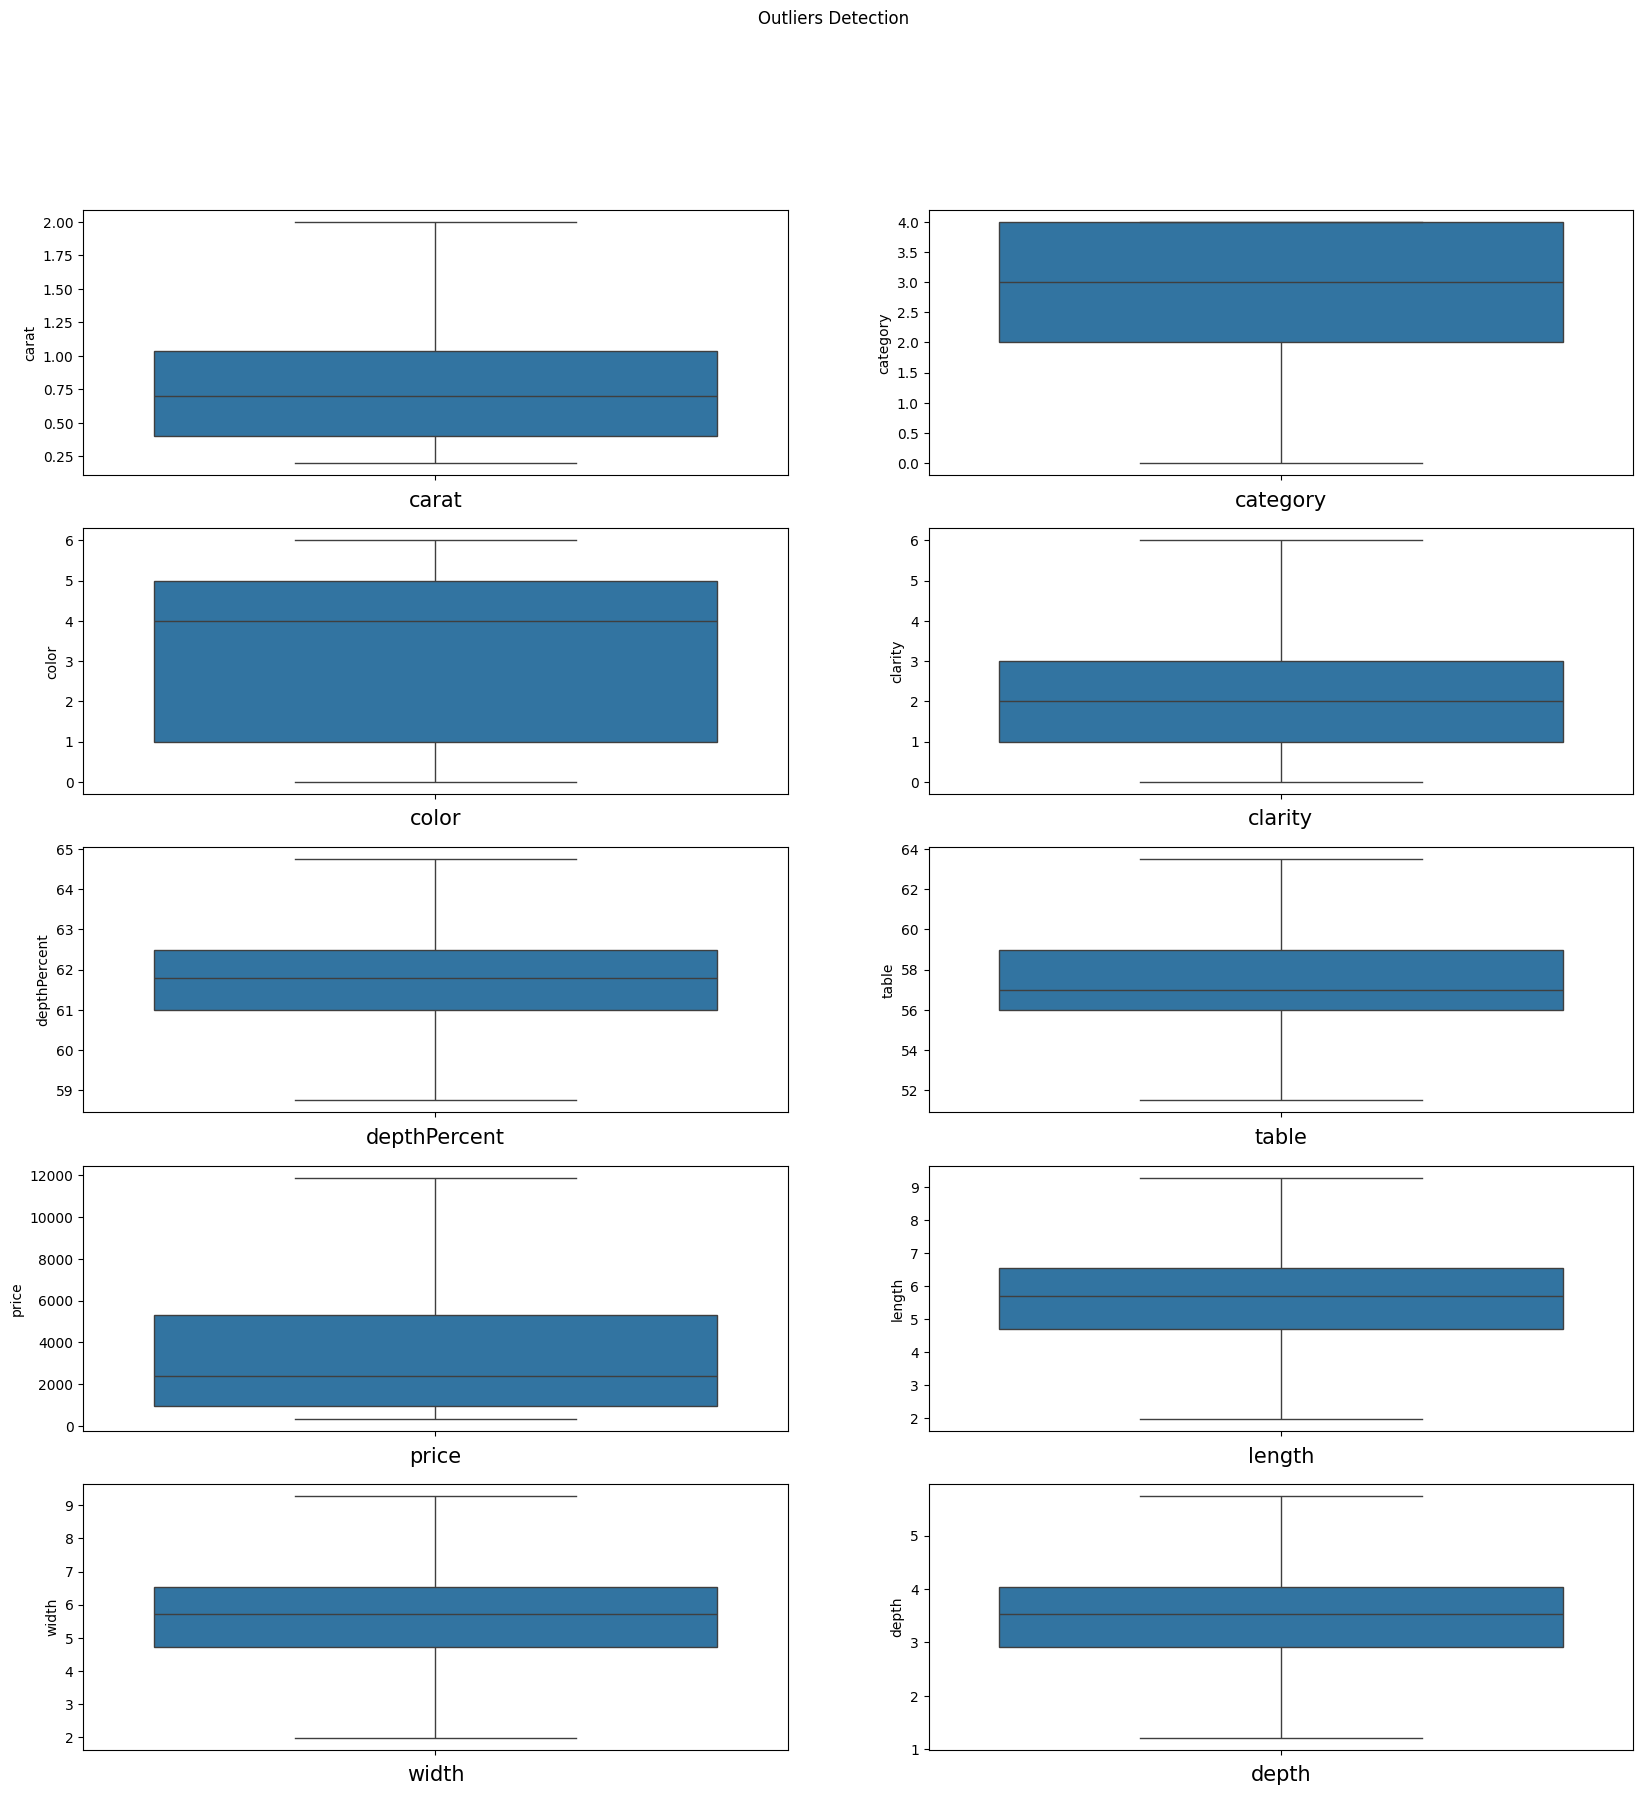

<Figure size 640x480 with 0 Axes>

In [32]:
## Checking Outliers By Calculation [AFTER]
plt.figure(figsize=(20,20))
plt.suptitle("Outliers Detection")
pltn=1
for i in df:
    if pltn <=10:
        plt.subplot(5,2,pltn)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
    pltn=pltn+1

plt.show()
plt.tight_layout()

## Feature Selection

#### Correlation between the target variable and independent variables using HEAT map

In [33]:
#Creating Correlation Matrix
df.corr()

carat  category     color   clarity  depthPercent     table  \
carat         1.000000 -0.136316 -0.063079 -0.288807      0.021879  0.187506   
category     -0.136316  1.000000  0.027185  0.138656     -0.228698 -0.427832   
color        -0.063079  0.027185  1.000000  0.029650     -0.002252 -0.034827   
clarity      -0.288807  0.138656  0.029650  1.000000     -0.032755 -0.134234   
depthPercent  0.021879 -0.228698 -0.002252 -0.032755      1.000000 -0.299909   
table         0.187506 -0.427832 -0.034827 -0.134234     -0.299909  1.000000   
price         0.936588 -0.060275 -0.013746 -0.147723     -0.008707  0.136874   
length        0.981861 -0.125754 -0.055140 -0.308254     -0.028928  0.198395   
width         0.981131 -0.125249 -0.055396 -0.305886     -0.031644  0.192458   
depth         0.977447 -0.151425 -0.055283 -0.307338      0.089994  0.158133   

                 price    length     width     depth  
carat         0.936588  0.981861  0.981131  0.977447  
category     -0.060275 -0.125754 -0.125249 -0.151425  
color        -0.013746 -0.055140 -0.055396 -0.055283  
clarity      -0.147723 -0.308254 -0.305886 -0.307338  
depthPercent -0.008707 -0.028928 -0.031644  0.089994  
table         0.136874  0.198395  0.192458  0.158133  
price         1.000000  0.911966  0.913493  0.905019  
length        0.911966  1.000000  0.998362  0.988231  
width         0.913493  0.998362  1.000000  0.987852  
depth         0.905019  0.988231  0.987852  1.000000

<Axes: >

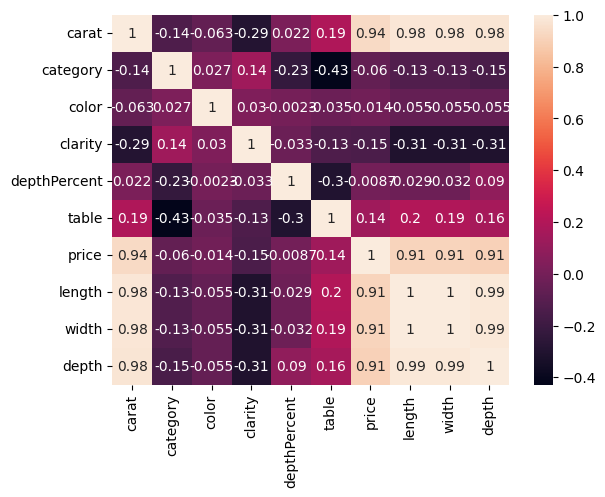

In [34]:
## Visualizing the correlation matrix by plotting heat map.
sns.heatmap(df.corr(),annot=True)

- This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

- This heat map contains both positive and negative correlation

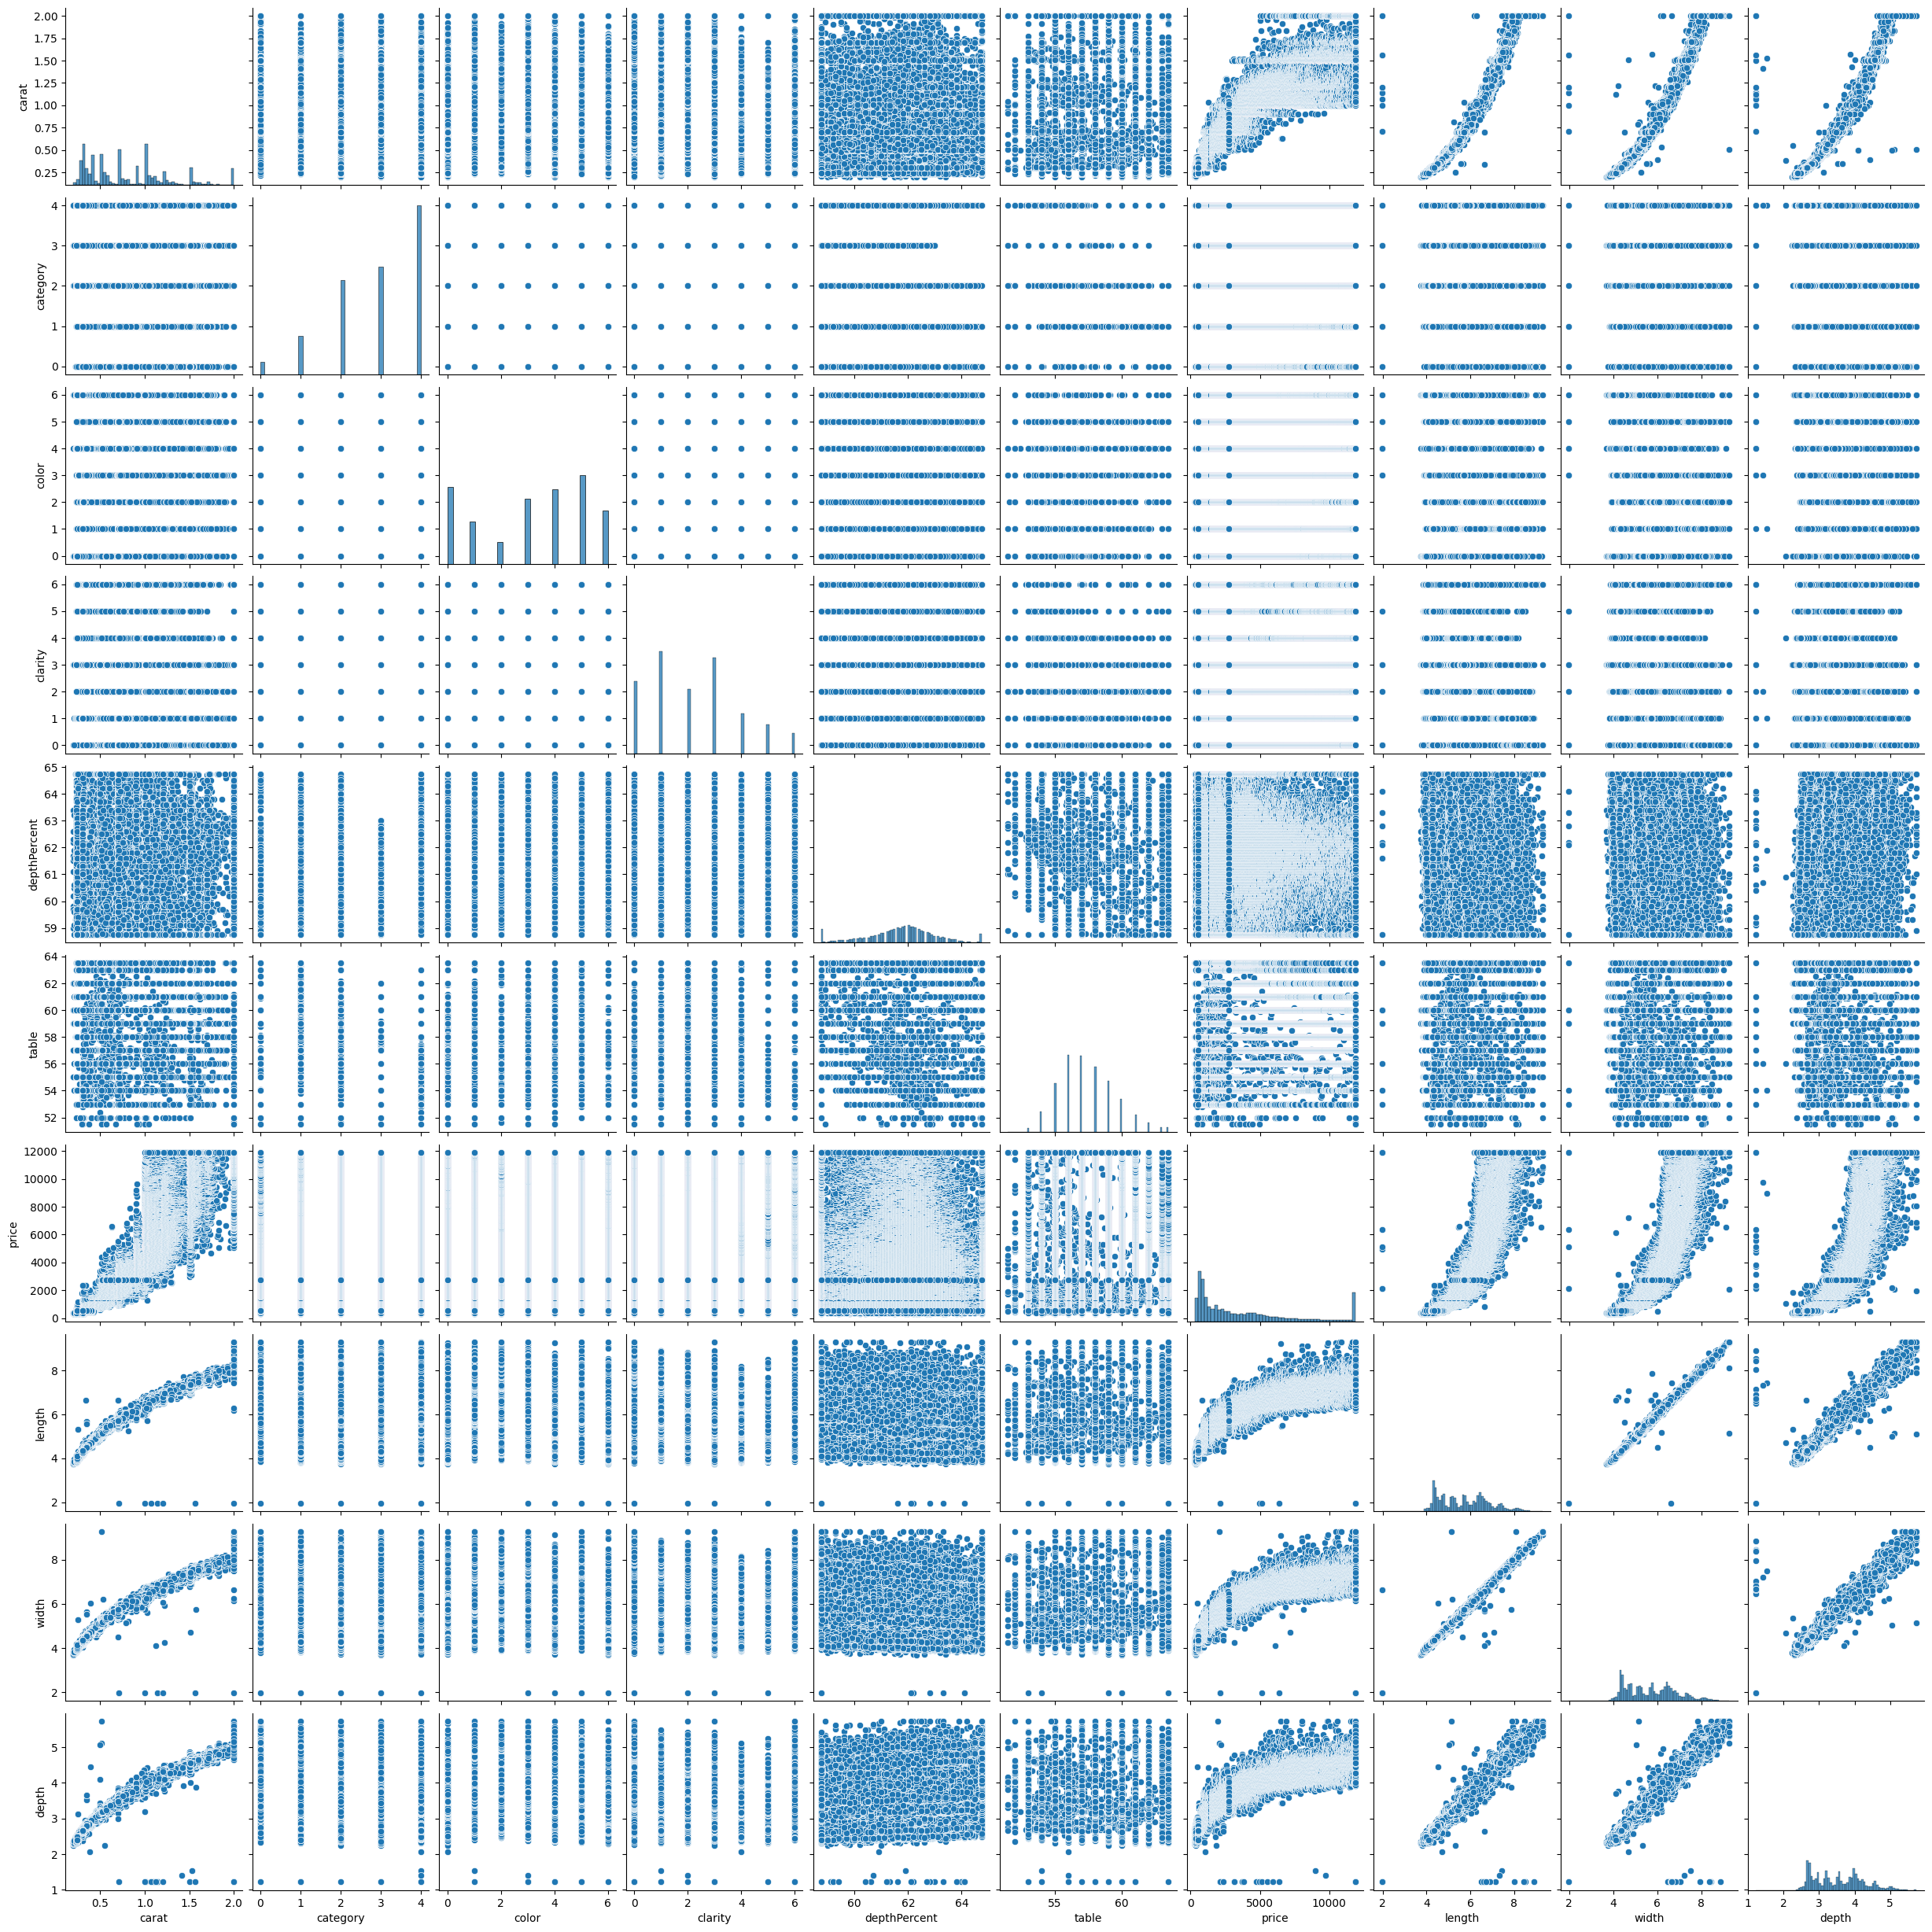

In [35]:
sns.pairplot(df)

In [36]:
df1=df.iloc[:,[0,2,3,4,5,6,7,8,9]]
df1

carat  color  clarity  depthPercent  table   price  length  width  \
0       0.23      0      0.0         61.50   55.0   326.0    3.95   3.98   
1       0.21      0      1.0         59.80   61.0   326.0    3.89   3.84   
2       0.23      0      2.0         58.75   63.5   327.0    4.05   4.07   
3       0.29      1      3.0         62.40   58.0   334.0    4.20   4.23   
4       0.31      2      0.0         63.30   58.0   335.0    4.34   4.35   
...      ...    ...      ...           ...    ...     ...     ...    ...   
53938   0.86      3      0.0         61.00   58.0  2757.0    6.15   6.12   
53939   0.75      6      0.0         62.20   55.0  2757.0    5.83   5.87   
53940   0.71      0      1.0         60.50   55.0  2756.0    5.79   5.74   
53941   0.71      4      1.0         59.80   62.0  2756.0    5.74   5.73   
53942   0.70      0      3.0         60.50   59.0  2757.0    5.71   5.76   

       depth  
0       2.43  
1       2.31  
2       2.31  
3       2.63  
4       2.75  
...      ...  
53938   3.74  
53939   3.64  
53940   3.49  
53941   3.43  
53942   3.47  

[53943 rows x 9 columns]

In [37]:
x=df.drop("category",axis=1)
x

carat  color  clarity  depthPercent  table   price  length  width  \
0       0.23      0      0.0         61.50   55.0   326.0    3.95   3.98   
1       0.21      0      1.0         59.80   61.0   326.0    3.89   3.84   
2       0.23      0      2.0         58.75   63.5   327.0    4.05   4.07   
3       0.29      1      3.0         62.40   58.0   334.0    4.20   4.23   
4       0.31      2      0.0         63.30   58.0   335.0    4.34   4.35   
...      ...    ...      ...           ...    ...     ...     ...    ...   
53938   0.86      3      0.0         61.00   58.0  2757.0    6.15   6.12   
53939   0.75      6      0.0         62.20   55.0  2757.0    5.83   5.87   
53940   0.71      0      1.0         60.50   55.0  2756.0    5.79   5.74   
53941   0.71      4      1.0         59.80   62.0  2756.0    5.74   5.73   
53942   0.70      0      3.0         60.50   59.0  2757.0    5.71   5.76   

       depth  
0       2.43  
1       2.31  
2       2.31  
3       2.63  
4       2.75  
...      ...  
53938   3.74  
53939   3.64  
53940   3.49  
53941   3.43  
53942   3.47  

[53943 rows x 9 columns]

In [38]:
y=df["category"]
y

0        4
1        3
2        1
3        3
4        1
        ..
53938    3
53939    4
53940    3
53941    3
53942    2
Name: category, Length: 53943, dtype: int64

In [39]:
x=df.iloc[:,[0,2,3,4,5,6,7,8,9]]
y=df["category"]

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,stratify=y)

In [41]:
xtrain.shape

(43154, 9)

In [42]:
ytrain.shape

(43154,)

In [43]:
xtest.shape

(10789, 9)

In [44]:
ytest.shape

(10789,)

## 1.Logistic Regression Algorithm

In [45]:
log_reg=LogisticRegression(multi_class="ovr")
log_reg_model=log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression(multi_class='ovr')

In [46]:
ytrain_pred=log_reg_model.predict(xtrain)

In [47]:
## Predicting Training Data

acc=accuracy_score(ytrain,ytrain_pred)
print(f"accuracy_score is : {acc}")

cm=multilabel_confusion_matrix(ytrain,ytrain_pred)
print(f"confusion_matrix is: {cm}")

cr=classification_report(ytrain,ytrain_pred)
print(f"classification_report is : {cr}")



accuracy_score is : 0.5493349399823887
confusion_matrix is: [[[41866     0]
  [ 1277    11]]

 [[39229     0]
  [ 3925     0]]

 [[32379  1109]
  [ 9212   454]]

 [[25176  6944]
  [ 3772  7262]]

 [[14518 11395]
  [ 1262 15979]]]
classification_report is :               precision    recall  f1-score   support

           0       1.00      0.01      0.02      1288
           1       0.00      0.00      0.00      3925
           2       0.29      0.05      0.08      9666
           3       0.51      0.66      0.58     11034
           4       0.58      0.93      0.72     17241

    accuracy                           0.55     43154
   macro avg       0.48      0.33      0.28     43154
weighted avg       0.46      0.55      0.45     43154



In [48]:
ytest_pred=log_reg_model.predict(xtest)

In [49]:
## For testing data
acc=accuracy_score(ytest,ytest_pred)
print(f"accuracy_score is : {acc}")

cm=multilabel_confusion_matrix(ytest,ytest_pred)
print(f"confusion_matrix is: {cm}")

cr=classification_report(ytest,ytest_pred)
print(f"classification_report is : {cr}")

accuracy_score is : 0.5475020854574103
confusion_matrix is: [[[10467     0]
  [  320     2]]

 [[ 9808     0]
  [  981     0]]

 [[ 8089   283]
  [ 2316   101]]

 [[ 6218  1812]
  [  939  1820]]

 [[ 3692  2787]
  [  326  3984]]]
classification_report is :               precision    recall  f1-score   support

           0       1.00      0.01      0.01       322
           1       0.00      0.00      0.00       981
           2       0.26      0.04      0.07      2417
           3       0.50      0.66      0.57      2759
           4       0.59      0.92      0.72      4310

    accuracy                           0.55     10789
   macro avg       0.47      0.33      0.27     10789
weighted avg       0.45      0.55      0.45     10789



### Algorithm 2 : Decision Tree 

In [50]:
dt_clf=DecisionTreeClassifier()
dt_clf_model=dt_clf.fit(xtrain,ytrain)
dt_clf_model

DecisionTreeClassifier()

## Model Evaluation For Training data

In [51]:
ytain_pred=dt_clf_model.predict(xtrain)

In [52]:
acc=accuracy_score(ytrain,ytrain_pred)
print(f"accuracy_score is : {acc}")

cm=multilabel_confusion_matrix(ytrain,ytrain_pred)
print(f"confusion_matrix is: {cm}")

cr=classification_report(ytrain,ytrain_pred)
print(f"classification_report is : {cr}")

accuracy_score is : 0.5493349399823887
confusion_matrix is: [[[41866     0]
  [ 1277    11]]

 [[39229     0]
  [ 3925     0]]

 [[32379  1109]
  [ 9212   454]]

 [[25176  6944]
  [ 3772  7262]]

 [[14518 11395]
  [ 1262 15979]]]
classification_report is :               precision    recall  f1-score   support

           0       1.00      0.01      0.02      1288
           1       0.00      0.00      0.00      3925
           2       0.29      0.05      0.08      9666
           3       0.51      0.66      0.58     11034
           4       0.58      0.93      0.72     17241

    accuracy                           0.55     43154
   macro avg       0.48      0.33      0.28     43154
weighted avg       0.46      0.55      0.45     43154



In [53]:
ytest_pred=dt_clf_model.predict(xtest)

In [54]:
acc=accuracy_score(ytest,ytest_pred)
print(f"accuracy_score is : {acc}")

cm=multilabel_confusion_matrix(ytest,ytest_pred)
print(f"confusion_matrix is: {cm}")

cr=classification_report(ytest,ytest_pred)
print(f"classification_report is : {cr}")

accuracy_score is : 0.6957085920845305
confusion_matrix is: [[[10391    76]
  [   98   224]]

 [[ 9441   367]
  [  354   627]]

 [[ 7195  1177]
  [ 1149  1268]]

 [[ 7186   844]
  [  755  2004]]

 [[ 5660   819]
  [  927  3383]]]
classification_report is :               precision    recall  f1-score   support

           0       0.75      0.70      0.72       322
           1       0.63      0.64      0.63       981
           2       0.52      0.52      0.52      2417
           3       0.70      0.73      0.71      2759
           4       0.81      0.78      0.79      4310

    accuracy                           0.70     10789
   macro avg       0.68      0.67      0.68     10789
weighted avg       0.70      0.70      0.70     10789



### Algorithm 2.1 Decision Tree With Hyperparameter tuning

In [55]:
hyperpara= {
    "criterion":["entropy","gini"],
    "max_depth":np.arange(5,30),
    "min_samples_split":np.arange(5,30),
    "min_samples_leaf":np.arange(5,30)
}   


In [56]:
rscv=RandomizedSearchCV(dt_clf_model,hyperpara,cv=5)

In [57]:
rscv=rscv.fit(xtrain,ytrain)
rscv

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [58]:
rscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=26, min_samples_leaf=21,
                       min_samples_split=25)

In [59]:
dt_hyp=DecisionTreeClassifier(criterion='entropy', max_depth=27, min_samples_leaf=23, min_samples_split=7)
dt_hyp_model=dt_hyp.fit(xtrain,ytrain)
dt_hyp_model

DecisionTreeClassifier(criterion='entropy', max_depth=27, min_samples_leaf=23,
                       min_samples_split=7)

## Model Evaluation Of Training data with hyperparameter tuning

In [60]:
ytrain_pred=dt_hyp_model.predict(xtrain)

In [61]:
acc=accuracy_score(ytrain,ytrain_pred)
print(f"accuracy_score is : {acc}")

cm=multilabel_confusion_matrix(ytrain,ytrain_pred)
print(f"confusion_matrix is: {cm}")

cr=classification_report(ytrain,ytrain_pred)
print(f"classification_report is : {cr}")

accuracy_score is : 0.7849330305417807
confusion_matrix is: [[[41706   160]
  [  249  1039]]

 [[38304   925]
  [ 1224  2701]]

 [[30854  2634]
  [ 3999  5667]]

 [[29749  2371]
  [ 2336  8698]]

 [[22722  3191]
  [ 1473 15768]]]
classification_report is :               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1288
           1       0.74      0.69      0.72      3925
           2       0.68      0.59      0.63      9666
           3       0.79      0.79      0.79     11034
           4       0.83      0.91      0.87     17241

    accuracy                           0.78     43154
   macro avg       0.78      0.76      0.77     43154
weighted avg       0.78      0.78      0.78     43154



In [62]:
ytest_pred=dt_hyp_model.predict(xtest)

In [63]:
acc=accuracy_score(ytest,ytest_pred)
print(f"accuracy_score is : {acc}")

cm=multilabel_confusion_matrix(ytest,ytest_pred)
print(f"confusion_matrix is: {cm}")

cr=classification_report(ytest,ytest_pred)
print(f"classification_report is : {cr}")

accuracy_score is : 0.7479840578366855
confusion_matrix is: [[[10424    43]
  [   72   250]]

 [[ 9521   287]
  [  369   612]]

 [[ 7584   788]
  [ 1166  1251]]

 [[ 7278   752]
  [  673  2086]]

 [[ 5630   849]
  [  439  3871]]]
classification_report is :               precision    recall  f1-score   support

           0       0.85      0.78      0.81       322
           1       0.68      0.62      0.65       981
           2       0.61      0.52      0.56      2417
           3       0.74      0.76      0.75      2759
           4       0.82      0.90      0.86      4310

    accuracy                           0.75     10789
   macro avg       0.74      0.71      0.73     10789
weighted avg       0.74      0.75      0.74     10789



## Algorithm 3 :  Random Forest

In [64]:
rf_clf=RandomForestClassifier()
rf_clf_model=rf_clf.fit(xtrain,ytrain)
rf_clf_model

RandomForestClassifier()

In [65]:
ytrain_pred=rf_clf_model.predict(xtrain)

In [66]:
#For Training Data 
acc=accuracy_score(ytrain,ytrain_pred)
print(f"accuracy_score: {acc}")

cm=multilabel_confusion_matrix(ytrain,ytrain_pred)
print(f"multilabel confusion Matrix : {cm}")

cr=confusion_matrix(ytrain,ytrain_pred)
print(f"confusion_matrix: {cr}")

accuracy_score: 0.9998841358854336
multilabel confusion Matrix : [[[41866     0]
  [    0  1288]]

 [[39229     0]
  [    1  3924]]

 [[33487     1]
  [    3  9663]]

 [[32117     3]
  [    1 11033]]

 [[25912     1]
  [    0 17241]]]
confusion_matrix: [[ 1288     0     0     0     0]
 [    0  3924     1     0     0]
 [    0     0  9663     3     0]
 [    0     0     0 11033     1]
 [    0     0     0     0 17241]]


In [67]:
ytest_pred=rf_clf_model.predict(xtest)

In [68]:
#For testing Data

acc=accuracy_score(ytest,ytest_pred)
print(f"accuracy_score: {acc}")

print("*"*50)

cm=multilabel_confusion_matrix(ytest,ytest_pred)
print(f"multilabel_confusion_matrix: {cm}")

print("*"*50)
cr=classification_report(ytest,ytest_pred)
print(f"classification report: {cr}")

accuracy_score: 0.7790342015015294
**************************************************
multilabel_confusion_matrix: [[[10430    37]
  [   74   248]]

 [[ 9608   200]
  [  329   652]]

 [[ 7733   639]
  [ 1088  1329]]

 [[ 7304   726]
  [  514  2245]]

 [[ 5697   782]
  [  379  3931]]]
**************************************************
classification report:               precision    recall  f1-score   support

           0       0.87      0.77      0.82       322
           1       0.77      0.66      0.71       981
           2       0.68      0.55      0.61      2417
           3       0.76      0.81      0.78      2759
           4       0.83      0.91      0.87      4310

    accuracy                           0.78     10789
   macro avg       0.78      0.74      0.76     10789
weighted avg       0.77      0.78      0.77     10789



## 3.1RandomForest With HyperParameter Tunning

In [69]:
hyperparameters={
    "n_estimators":np.arange(20,100),
    "criterion": ["entropy","gini"],
    "max_depth" : np.arange(5,20),
    "min_samples_split" : np.arange(5,15),
    "min_samples_leaf" : np.arange(5,15)
}

In [70]:
rscv=RandomizedSearchCV(rf_clf_model,hyperparameters,cv=5)
rscv=rscv.fit(xtrain,ytrain)
rscv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [71]:
rscv.best_estimator_

RandomForestClassifier(max_depth=18, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=61)

In [72]:
rf_clf_hyp=RandomForestClassifier(criterion="entropy",max_depth=19,min_samples_leaf=5,min_samples_split=10,n_estimators=85)
rf_clf_hyp_model=rf_clf_hyp.fit(xtrain,ytrain)
rf_clf_hyp_model

RandomForestClassifier(criterion='entropy', max_depth=19, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=85)

In [73]:
ytrain_pred=rf_clf_hyp_model.predict(xtrain)

In [74]:
#for training data of random forest Hypothesis
acc=accuracy_score(ytrain,ytain_pred)
print(f"accuracy_score: {acc}")
print("*"*50)
cm=multilabel_confusion_matrix(ytrain,ytrain_pred)
print(f"confusion_matrix: {cm}")
print("*"*50)
cr=classification_report(ytrain,ytrain_pred)
print(f"Classification report: {cr}")


accuracy_score: 0.9998841358854336
**************************************************
confusion_matrix: [[[41781    85]
  [  172  1116]]

 [[38828   401]
  [  747  3178]]

 [[32559   929]
  [ 3357  6309]]

 [[29872  2248]
  [ 1258  9776]]

 [[23065  2848]
  [  977 16264]]]
**************************************************
Classification report:               precision    recall  f1-score   support

           0       0.93      0.87      0.90      1288
           1       0.89      0.81      0.85      3925
           2       0.87      0.65      0.75      9666
           3       0.81      0.89      0.85     11034
           4       0.85      0.94      0.89     17241

    accuracy                           0.85     43154
   macro avg       0.87      0.83      0.85     43154
weighted avg       0.85      0.85      0.85     43154



In [75]:
ytest_pred=rf_clf_hyp_model.predict(xtest)

In [76]:
# For Testing Data of Random forest classification  
acc=accuracy_score(ytest,ytest_pred)
print(f"accuracy_score: {acc}")
print("*"*50)
cm=multilabel_confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix: {cm}")
print("*"*50)
cr=classification_report(ytest,ytest_pred)
print(f"classification report: {cr}")

accuracy_score: 0.7743998517008064
**************************************************
Confusion Matrix: [[[10427    40]
  [   76   246]]

 [[ 9604   204]
  [  342   639]]

 [[ 7915   457]
  [ 1242  1175]]

 [[ 7138   892]
  [  456  2303]]

 [[ 5638   841]
  [  318  3992]]]
**************************************************
classification report:               precision    recall  f1-score   support

           0       0.86      0.76      0.81       322
           1       0.76      0.65      0.70       981
           2       0.72      0.49      0.58      2417
           3       0.72      0.83      0.77      2759
           4       0.83      0.93      0.87      4310

    accuracy                           0.77     10789
   macro avg       0.78      0.73      0.75     10789
weighted avg       0.77      0.77      0.76     10789



## Algorithm 4 : Adaboost Algorithm 

In [77]:
ad_clf=AdaBoostClassifier()
ad_clf_model=ad_clf.fit(xtrain,ytrain)
ad_clf_model

AdaBoostClassifier()

In [78]:
ytrain_pred=ad_clf_model.predict(xtrain)

In [79]:
# For Training data of Adaboost Algorithm
acc=accuracy_score(ytrain,ytrain_pred)
print(f"accuracy_score: {acc}")
print("*"*50)
cm=multilabel_confusion_matrix(ytrain,ytrain_pred)
print(f"confusion matrix: {cm}")
print("*"*50)
cr=classification_report(ytrain,ytrain_pred)
print(f"classification report: {cr}")

accuracy_score: 0.6744218380683135
**************************************************
confusion matrix: [[[41809    57]
  [ 1118   170]]

 [[37626  1603]
  [ 2945   980]]

 [[30850  2638]
  [ 7102  2564]]

 [[26471  5649]
  [ 1647  9387]]

 [[21810  4103]
  [ 1238 16003]]]
**************************************************
classification report:               precision    recall  f1-score   support

           0       0.75      0.13      0.22      1288
           1       0.38      0.25      0.30      3925
           2       0.49      0.27      0.34      9666
           3       0.62      0.85      0.72     11034
           4       0.80      0.93      0.86     17241

    accuracy                           0.67     43154
   macro avg       0.61      0.49      0.49     43154
weighted avg       0.64      0.67      0.64     43154



In [80]:
ytest_pred=ad_clf_model.predict(xtest)


In [81]:
# for testing data of Adaboost algorithm

acc=accuracy_score(ytest,ytest_pred)
print(f"accuracy score: {acc}")
print("*"*50)
cm=multilabel_confusion_matrix(ytest,ytest_pred)
print(f"confusion matrix: {cm}")
print("*"*50)
cr=classification_report(ytest,ytest_pred)
print(f"classification_report : {cr}")

accuracy score: 0.6726295300769302
**************************************************
confusion matrix: [[[10453    14]
  [  294    28]]

 [[ 9395   413]
  [  734   247]]

 [[ 7710   662]
  [ 1767   650]]

 [[ 6581  1449]
  [  414  2345]]

 [[ 5485   994]
  [  323  3987]]]
**************************************************
classification_report :               precision    recall  f1-score   support

           0       0.67      0.09      0.15       322
           1       0.37      0.25      0.30       981
           2       0.50      0.27      0.35      2417
           3       0.62      0.85      0.72      2759
           4       0.80      0.93      0.86      4310

    accuracy                           0.67     10789
   macro avg       0.59      0.48      0.48     10789
weighted avg       0.64      0.67      0.64     10789



## 4.1Adaboost with HyperParameter tunning

In [82]:
hyp= {"n_estimators":np.arange(20,60),
      "learning_rate":[0,0.1,0.01,0.001,1]}

In [83]:
rscv=RandomizedSearchCV(ad_clf_model,hyp,cv=5)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0, 0.1, 0.01, 0.001,
                                                          1],
                                        'n_estimators': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59])})

In [84]:
rscv.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=48)

In [85]:
ad_clf_hyp=AdaBoostClassifier(learning_rate=0.1,n_estimators=59)
ad_clf_hyp_model=ad_clf_hyp.fit(xtrain,ytrain)
ad_clf_hyp_model

AdaBoostClassifier(learning_rate=0.1, n_estimators=59)

In [86]:
ytrain_pred=ad_clf_hyp_model.predict(xtrain)


In [87]:
# for training data 

acc=accuracy_score(ytrain,ytrain_pred)
print(f"accuracy_score: {acc}")
print("*"*50)

cm=multilabel_confusion_matrix(ytrain,ytrain_pred)
print(f"Confusion Matrix is : {cm}")

cr=classification_report(ytrain,ytrain_pred)
print(f"classification_report: {cr}")

accuracy_score: 0.6561616536126431
**************************************************
Confusion Matrix is : [[[41866     0]
  [ 1288     0]]

 [[38664   565]
  [ 3441   484]]

 [[29917  3571]
  [ 7622  2044]]

 [[25779  6341]
  [ 1466  9568]]

 [[21552  4361]
  [ 1021 16220]]]
classification_report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1288
           1       0.46      0.12      0.19      3925
           2       0.36      0.21      0.27      9666
           3       0.60      0.87      0.71     11034
           4       0.79      0.94      0.86     17241

    accuracy                           0.66     43154
   macro avg       0.44      0.43      0.41     43154
weighted avg       0.59      0.66      0.60     43154



In [88]:
ytest_pred=ad_clf_hyp_model.predict(xtest)

In [89]:
#For Testing

acc=accuracy_score(ytest,ytest_pred)
print(f"accuracy_score: {acc}")

cm=multilabel_confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix is: {cm}")

cr=classification_report(ytest,ytest_pred)
print(f"classification_report: {cr}")

accuracy_score: 0.6536286958939661
Confusion Matrix is: [[[10467     0]
  [  322     0]]

 [[ 9654   154]
  [  866   115]]

 [[ 7492   880]
  [ 1930   487]]

 [[ 6397  1633]
  [  357  2402]]

 [[ 5409  1070]
  [  262  4048]]]
classification_report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.43      0.12      0.18       981
           2       0.36      0.20      0.26      2417
           3       0.60      0.87      0.71      2759
           4       0.79      0.94      0.86      4310

    accuracy                           0.65     10789
   macro avg       0.43      0.43      0.40     10789
weighted avg       0.59      0.65      0.60     10789



## 5.Support Vector Classifier Algorithm

In [90]:
#svc=SVC()
#svc_model=svc.fit(xtrain,ytrain)
#svc_model

In [91]:
#ytrain_pred=svc_model.predict(xtrain)

In [92]:
#for training data
# acc = accuracy_score(ytrain,ytrain_pred)
# print(f"Accuracy : {acc}")
# print("*"*50)

# cm= multilabel_confusion_matrix(ytrain,ytrain_pred)
# print(f"Confusion Matrix : \n{cm}")
# print("*"*50)


# cr = classification_report(ytrain,ytrain_pred)
# print("Classification Report : \n",cr)

In [93]:
# ytest_pred=svc_model.predict(xtest)

In [94]:
#for testing data
# acc = accuracy_score(ytest,ytest_pred)
# print(f"Accuracy : {acc}")
# print("*"*50)

# cm = multilabel_confusion_matrix(ytest,ytest_pred)
# print(f"Confusion Matrix : \n{cm}")
# print("*"*50)


# cr = classification_report(ytest,ytest_pred)
# print("Classification Report : \n",cr)

## 6.Gradient Boost

In [95]:
grb_clf=GradientBoostingClassifier()
grb_clf_model=grb_clf.fit(xtrain,ytrain)
grb_clf_model

GradientBoostingClassifier()

In [96]:
ytrain_pred=grb_clf_model.predict(xtrain)

In [97]:
#for training data
acc = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {acc}")
print("*"*50)

cm= multilabel_confusion_matrix(ytrain,ytrain_pred)
print(f"Confusion Matrix : \n{cm}")
print("*"*50)


cr = classification_report(ytrain,ytrain_pred)
print("Classification Report : \n",cr)

Accuracy : 0.7608796403577884
**************************************************
Confusion Matrix : 
[[[41727   139]
  [  213  1075]]

 [[38469   760]
  [ 1473  2452]]

 [[31698  1790]
  [ 5587  4079]]

 [[27926  4194]
  [ 1628  9406]]

 [[22477  3436]
  [ 1418 15823]]]
**************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1288
           1       0.76      0.62      0.69      3925
           2       0.70      0.42      0.53      9666
           3       0.69      0.85      0.76     11034
           4       0.82      0.92      0.87     17241

    accuracy                           0.76     43154
   macro avg       0.77      0.73      0.74     43154
weighted avg       0.76      0.76      0.75     43154



In [98]:
ytest_pred=grb_clf_model.predict(xtest)


In [99]:
#for testing data
acc = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc}")
print("*"*50)

cm = multilabel_confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix : \n{cm}")
print("*"*50)


cr = classification_report(ytest,ytest_pred)
print("Classification Report : \n",cr)

Accuracy : 0.7507646677171192
**************************************************
Confusion Matrix : 
[[[10423    44]
  [   77   245]]

 [[ 9614   194]
  [  398   583]]

 [[ 7896   476]
  [ 1421   996]]

 [[ 6905  1125]
  [  424  2335]]

 [[ 5629   850]
  [  369  3941]]]
**************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       322
           1       0.75      0.59      0.66       981
           2       0.68      0.41      0.51      2417
           3       0.67      0.85      0.75      2759
           4       0.82      0.91      0.87      4310

    accuracy                           0.75     10789
   macro avg       0.75      0.71      0.72     10789
weighted avg       0.75      0.75      0.74     10789



## 7.Catboost

In [100]:
cb_clf=CatBoostClassifier()
cb_clf_model=cb_clf.fit(xtrain,ytrain)
cb_clf_model



Learning rate set to 0.095876
0:	learn: 1.4527481	total: 186ms	remaining: 3m 5s
1:	learn: 1.3357274	total: 208ms	remaining: 1m 43s
2:	learn: 1.2479931	total: 227ms	remaining: 1m 15s
3:	learn: 1.1799975	total: 247ms	remaining: 1m 1s
4:	learn: 1.1245209	total: 266ms	remaining: 53s
5:	learn: 1.0747820	total: 286ms	remaining: 47.4s
6:	learn: 1.0328592	total: 307ms	remaining: 43.5s
7:	learn: 0.9978987	total: 326ms	remaining: 40.5s
8:	learn: 0.9671060	total: 345ms	remaining: 38s
9:	learn: 0.9420638	total: 365ms	remaining: 36.2s
10:	learn: 0.9209809	total: 386ms	remaining: 34.7s
11:	learn: 0.9011771	total: 405ms	remaining: 33.3s
12:	learn: 0.8838389	total: 426ms	remaining: 32.3s
13:	learn: 0.8697151	total: 447ms	remaining: 31.5s
14:	learn: 0.8566483	total: 471ms	remaining: 30.9s
15:	learn: 0.8454533	total: 492ms	remaining: 30.3s
16:	learn: 0.8339309	total: 512ms	remaining: 29.6s
17:	learn: 0.8238035	total: 532ms	remaining: 29.1s
18:	learn: 0.8153548	total: 553ms	remaining: 28.5s
19:	learn: 0.

In [101]:
ytrain_pred=cb_clf_model.predict(xtrain)


In [102]:
#for Training data
acc = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {acc}")
print("*"*50)

cm= multilabel_confusion_matrix(ytrain,ytrain_pred)
print(f"Confusion Matrix : \n{cm}")
print("*"*50)


cr = classification_report(ytrain,ytrain_pred)
print("Classification Report : \n",cr)

Accuracy : 0.8264123835565649
**************************************************
Confusion Matrix : 
[[[41781    85]
  [  143  1145]]

 [[38696   533]
  [ 1026  2899]]

 [[31662  1826]
  [ 3527  6139]]

 [[30177  1943]
  [ 1664  9370]]

 [[22809  3104]
  [ 1131 16110]]]
**************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      1288
           1       0.84      0.74      0.79      3925
           2       0.77      0.64      0.70      9666
           3       0.83      0.85      0.84     11034
           4       0.84      0.93      0.88     17241

    accuracy                           0.83     43154
   macro avg       0.84      0.81      0.82     43154
weighted avg       0.82      0.83      0.82     43154



In [103]:
#for testing data
acc = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc}")
print("*"*50)

cm= multilabel_confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix : \n{cm}")
print("*"*50)


cr = classification_report(ytest,ytest_pred)
print("Classification Report : \n",cr)

Accuracy : 0.7507646677171192
**************************************************
Confusion Matrix : 
[[[10423    44]
  [   77   245]]

 [[ 9614   194]
  [  398   583]]

 [[ 7896   476]
  [ 1421   996]]

 [[ 6905  1125]
  [  424  2335]]

 [[ 5629   850]
  [  369  3941]]]
**************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       322
           1       0.75      0.59      0.66       981
           2       0.68      0.41      0.51      2417
           3       0.67      0.85      0.75      2759
           4       0.82      0.91      0.87      4310

    accuracy                           0.75     10789
   macro avg       0.75      0.71      0.72     10789
weighted avg       0.75      0.75      0.74     10789



## 8.XGboost  
##### Best Model 

In [104]:
xgb_clf=XGBClassifier()
xgb_clf_model=xgb_clf.fit(xtrain,ytrain)
xgb_clf_model


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [105]:
ytrain_pred=xgb_clf_model.predict(xtrain)


In [106]:
#for Training Data
acc = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {acc}")
print("*"*50)

cm= multilabel_confusion_matrix(ytrain,ytrain_pred)
print(f"Confusion Matrix : \n{cm}")
print("*"*50)


cr = classification_report(ytrain,ytrain_pred)
print("Classification Report : \n",cr)

Accuracy : 0.859897112666265
**************************************************
Confusion Matrix : 
[[[41859     7]
  [   48  1240]]

 [[38937   292]
  [  614  3311]]

 [[31995  1493]
  [ 2888  6778]]

 [[30618  1502]
  [ 1527  9507]]

 [[23161  2752]
  [  969 16272]]]
**************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      1288
           1       0.92      0.84      0.88      3925
           2       0.82      0.70      0.76      9666
           3       0.86      0.86      0.86     11034
           4       0.86      0.94      0.90     17241

    accuracy                           0.86     43154
   macro avg       0.89      0.86      0.87     43154
weighted avg       0.86      0.86      0.86     43154



In [107]:
ytest_pred=xgb_clf_model.predict(xtest)

In [108]:
acc = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc}")
print("*"*50)

cm= multilabel_confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix : \n{cm}")
print("*"*50)


cr = classification_report(ytest,ytest_pred)
print("Classification Report : \n",cr)

Accuracy : 0.7949763648160163
**************************************************
Confusion Matrix : 
[[[10430    37]
  [   74   248]]

 [[ 9597   211]
  [  320   661]]

 [[ 7738   634]
  [  956  1461]]

 [[ 7491   539]
  [  506  2253]]

 [[ 5688   791]
  [  356  3954]]]
**************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.77      0.82       322
           1       0.76      0.67      0.71       981
           2       0.70      0.60      0.65      2417
           3       0.81      0.82      0.81      2759
           4       0.83      0.92      0.87      4310

    accuracy                           0.79     10789
   macro avg       0.79      0.76      0.77     10789
weighted avg       0.79      0.79      0.79     10789



#### Observation :

- From the observation of **accuracy score** of Training 85% and Testing 79% we can predict that XG Boost  Classifier is the best model.

### Save Pickle File 

In [109]:
import pickle 

In [110]:
with open("xyz.pkl","wb") as f:
    pickle.dump(xgb_clf_model,f)
    

In [111]:
#Taking Input From User
def category(carat,color,clarity,depthPercent,table,price,length,width,depth):
    data_test=pd.DataFrame({"carat":[carat],
                            "color":[color],
                            "clarity":[clarity],
                            "depthPercent":[depthPercent],
                            "table":[table],
                            "price":[price],
                            "length":[length],
                            "width":[width],
                            "depth":[depth]})
    with open("xyz.pkl","rb") as f :
        model=pickle.load(f)
    print(f"Category of Diamond : {model.predict(data_test)[0]}")

In [112]:
category(0.23,0,0,61.5,55.0,326,3.95,3.98,2.43)

Category of Diamond : 4


In [113]:
category(0.15,1,1,56.21,53.0,312,2.36,3.54,2.16)

Category of Diamond : 4


In [114]:
category(0.86,3,0,61.0,58.0,2757,6.15,6.12,3.74)

Category of Diamond : 3


In [115]:
df

carat  category  color  clarity  depthPercent  table   price  length  \
0       0.23         4      0      0.0         61.50   55.0   326.0    3.95   
1       0.21         3      0      1.0         59.80   61.0   326.0    3.89   
2       0.23         1      0      2.0         58.75   63.5   327.0    4.05   
3       0.29         3      1      3.0         62.40   58.0   334.0    4.20   
4       0.31         1      2      0.0         63.30   58.0   335.0    4.34   
...      ...       ...    ...      ...           ...    ...     ...     ...   
53938   0.86         3      3      0.0         61.00   58.0  2757.0    6.15   
53939   0.75         4      6      0.0         62.20   55.0  2757.0    5.83   
53940   0.71         3      0      1.0         60.50   55.0  2756.0    5.79   
53941   0.71         3      4      1.0         59.80   62.0  2756.0    5.74   
53942   0.70         2      0      3.0         60.50   59.0  2757.0    5.71   

       width  depth  
0       3.98   2.43  
1       3.84   2.31  
2       4.07   2.31  
3       4.23   2.63  
4       4.35   2.75  
...      ...    ...  
53938   6.12   3.74  
53939   5.87   3.64  
53940   5.74   3.49  
53941   5.73   3.43  
53942   5.76   3.47  

[53943 rows x 10 columns]